In [12]:
import scimple as scm
tab = scm.Table(scm.Table(scm.get_sample('xyz'), firstLine=2, lastLine=494,columnNames=['rien','atom','x','y','z'])['atom','x','y','z']) # 

input considered as path to file
input considered as array-like
input considered as array-like


In [24]:
tab.set_mapping_from_table()
tab.map(lambda i,line: [(i,line[1:]),('to_moy',line[3])] if line[0] == 'C' and line[3] < 20 else [],True).getMappingAsTable()
moy = tab.reduce(lambda key,z : (key,sum(z)/len(z)) if key == 'to_moy' else (key,z)).getMapping()["to_moy"][0]
to_plot = tab.reduce(lambda key,values: (key,values+[moy+2])).getMappingAsTable(flatten=4)


<IPython.core.display.Javascript object>


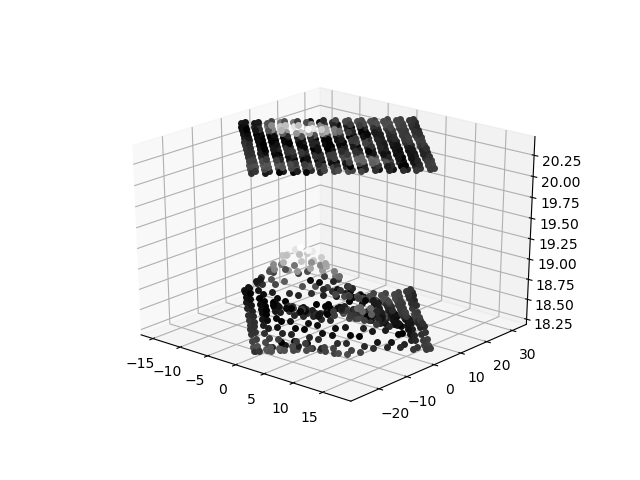

In [25]:
%matplotlib notebook
plot = scm.Plot(3)
plot.add(to_plot,1,2,3,markersize=4,coloredBy =(lambda i, line:abs(line[3]-moy)))\
.add(to_plot,1,2,4,markersize=4,coloredBy =(lambda i, line:abs(line[3]-moy)))
scm.show()
